In [1]:
pip install featurewiz

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(1234)

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [4]:
data = pd.read_csv('Final_DatasetK.csv')
 
data.shape

(100000, 12)

In [5]:
X = data.drop(['Predictions'],axis=1)
 
y = data.Predictions.values 

In [6]:
X_scaled =  StandardScaler().fit_transform(X)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [8]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.7466

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (100000, 12)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
##############################

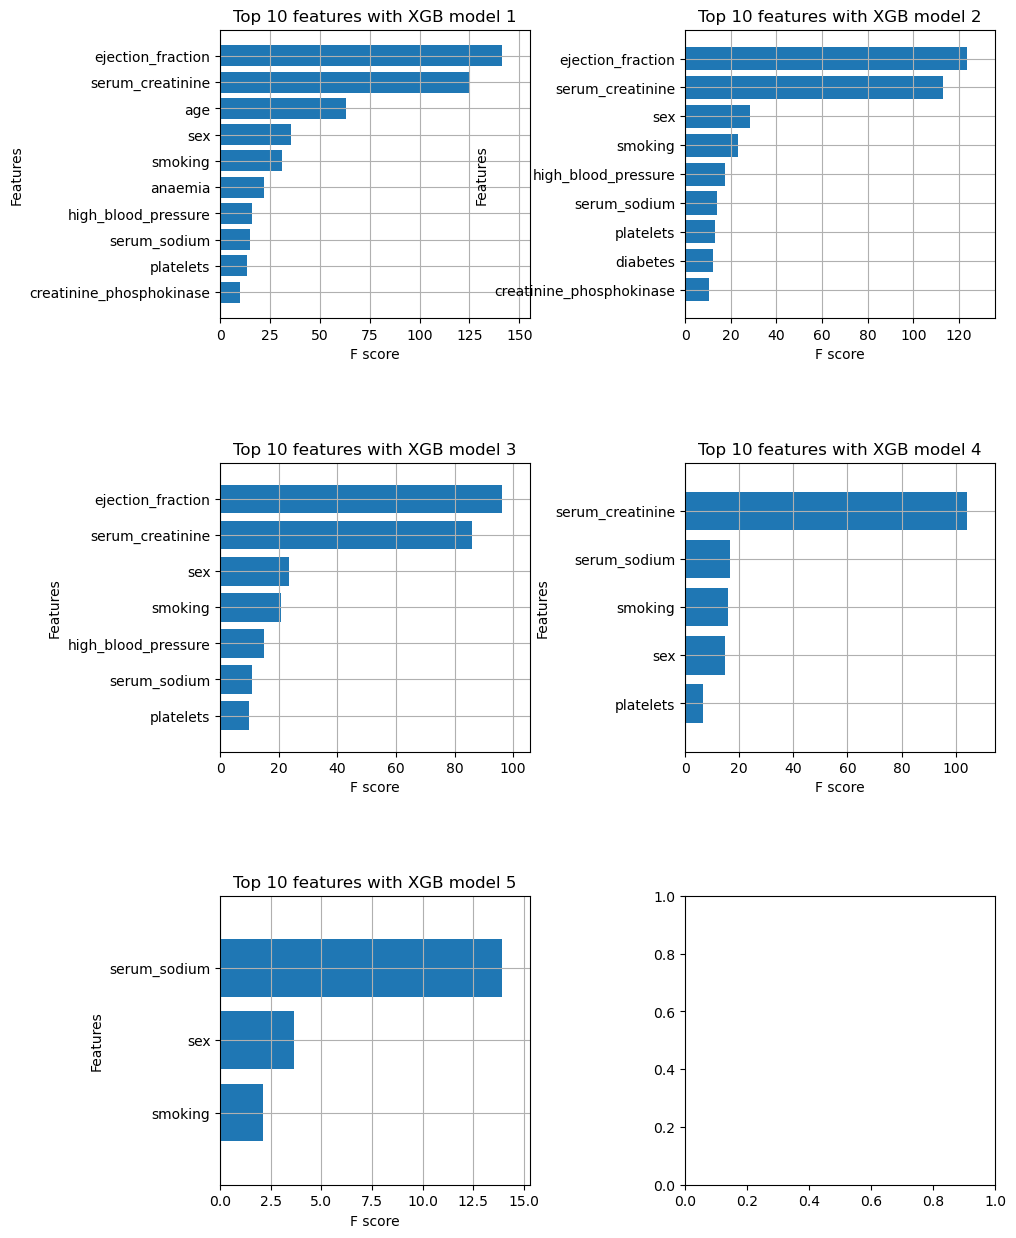

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 5 important features:
['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex']
Total Time taken for featurewiz selection = 9 seconds
Output contains a list of 5 important features and a train dataframe


In [10]:
# automatic feature selection by using featurewiz package
target = 'Predictions'
 
features, train = featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [11]:
print(features)

['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex']
